# HW 19
## James Camacho

**Kinetics Problem:**

We have the following sequence of reactions

$$A+B \underset{K_2}{\stackrel{K_1}{\rightleftharpoons}} AB,$$

$$2A + C \underset{K_4}{\stackrel{K_3}{\rightleftharpoons}} A_2C.$$

If we let $u_1 = [A], u_2 = [B], u_3 = [AB], u_4 = [C],$ and $u_5 = [A_2C]$ we get the following equations:

$$\begin{align*}&u_1' = -K_1u_1u_2 + K_2u_3 - 2K_3u_1^2u_4 + 2K_4u_5,\\
&u_2' = -K_1u_1u_2 + K_2u_3,\\
&u_3' = K_1u_1u_2,\\
&u_4' = -K_3u_1^2u_4 + K_4u_5,\\
&u_5' = K_3u_1^2u_4 - K_4u_5.\end{align*}$$

Let's code up an ODE solver for this with the forward Euler method.

In [275]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
def f(K, u):
    # zero-indexed rather than one-indexed
    f0 = -K[0]*u[0]*u[1] + K[1]*u[2] - 2*K[2]*u[0]**2*u[3] + 2*K[3]*u[4]
    f1 = -K[0]*u[0]*u[1] + K[1]*u[2]
    f2 = K[0]*u[0]*u[1] - K[1]*u[2]
    f3 = f4 = 0
    f3 = -K[2]*u[0]**2*u[3] + K[3]*u[4]
    f4 = K[2]*u[0]**2*u[3] - K[3]*u[4]
    
    return np.array([f0, f1, f2, f3, f4])

def Euler(K, u, h, duration=1):
    t = 0
    ts = [t]
    us = [u]
    while t < duration:
        t += h
        u = u + h*f(K, u)
        ts.append(t)
        us.append(u)
    return ts, us

### (a)
The largest eigenvalue (in magnitude) of the Jacobian in this particular problem is $-[K_1(u_1+u_2) + K_2]$. Notice that $u_1$ and $u_2$ are decreasing, so it will always be between 0 and

$$-[K_1(u_1(0) + u_2(0)) + K_2] = -22.$$

The forward Euler method is A-stable up to $\lambda h = -2$, so we need $h\le \frac{1}{11}.$ In practice we find we can actually go a little higher, up to $h\approx 0.15$.

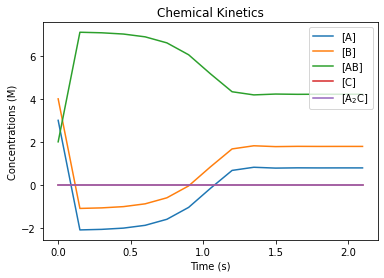

In [277]:
K = np.array([3., 1., 0., 0.])
u = np.array([3., 4., 2., 0., 0.])

h = 0.15
ts, us = Euler(K, u, h, duration=2)

plt.title("Chemical Kinetics")
plt.plot(ts, us, label=["[A]", "[B]", "[AB]", "[C]", "[A$_2$C]"])
plt.xlabel("Time (s)")
plt.ylabel("Concentrations (M)")
plt.legend();

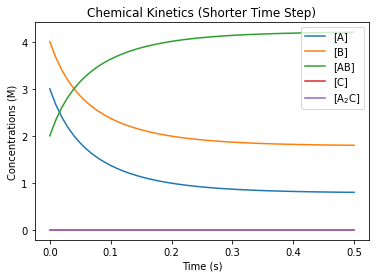

In [278]:
# A prettier graph.

K = np.array([3., 1., 0., 0.])
u = np.array([3., 4., 2., 0., 0.])

h = 0.01
ts, us = Euler(K, u, h, duration=0.5)

plt.title("Chemical Kinetics (Shorter Time Step)")
plt.plot(ts, us, label=["[A]", "[B]", "[AB]", "[C]", "[A$_2$C]"])
plt.xlabel("Time (s)")
plt.ylabel("Concentrations (M)")
plt.legend();

### (b)
In this case

$$-[K_1(u_1(0) + u_2(0)) + K_2] = -2101.$$

The forward Euler method is A-stable up to $\lambda h = -2$, so we need $h\le \frac{2}{2101}\approx 9.5\cdot 10^{-4}.$ In practice we find we can actually go a little higher, up to $h\approx 11.1\cdot 10^{-4}$.

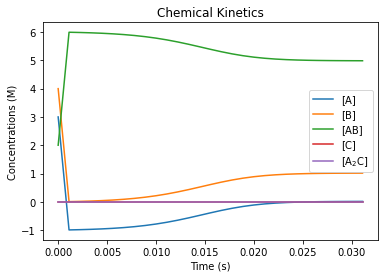

In [279]:
K = np.array([300., 1., 0., 0.])
u = np.array([3., 4., 2., 0., 0.])

h = 0.00111
ts, us = Euler(K, u, h, duration=3e-2)

plt.title("Chemical Kinetics")
plt.plot(ts, us, label=["[A]", "[B]", "[AB]", "[C]", "[A$_2$C]"])
plt.xlabel("Time (s)")
plt.ylabel("Concentrations (M)")
plt.legend();

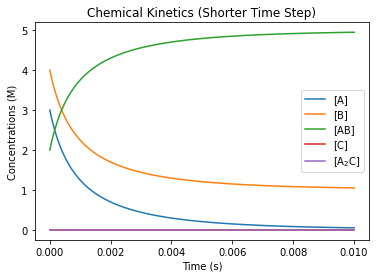

In [280]:
# A prettier graph.

K = np.array([300., 1., 0., 0.])
u = np.array([3., 4., 2., 0., 0.])

h = 1e-5
ts, us = Euler(K, u, h, duration=1e-2)

plt.title("Chemical Kinetics (Shorter Time Step)")
plt.plot(ts, us, label=["[A]", "[B]", "[AB]", "[C]", "[A$_2$C]"])
plt.xlabel("Time (s)")
plt.ylabel("Concentrations (M)")
plt.legend();